In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline

In [15]:
# import stuff
class Person(): 
    def __init__(self, name, img=None):
        self.name = name
        if img is not None: # Change to load image from file
            self.img = img
        
        self.partners = [self.name]
    
    def add_partner(self,person):
        if person.name not in self.partners:
            self.partners.append(person.name)
            person.partners.append(self.name)
            return True
        else:
            return False

    def clear_partners(self):
        self.partners = [self.name]
    def remove_last_partner(self):
        self.partners = self.partners[:-1]
    
    def check_availability(self,people):
        for person in people:
            if person.name not in self.partners:
                return True
        return False
    
    def __eq__(self,person):
        try:
            return self.name == person.name
        except AttributeError:
            return False
    def __neq__(self,person):
        return not self.__eq__(person)
    
    def __repr__(self):
#         from IPython.display import Image, display
#         display(Image(self.img,embed=True))

        return self.name

class Pool():
    def __init__(self, people):
        """ Initialize a pool of players. """
        self.items = []
        self.pairs = []
        for person in people:
            self.push(person)
    
    def push(self,person):
        """ Add a new person to the stack."""
        self.items.append(person)
    def replace(self, person):
        """ Add a person into the stack at the bottom."""
        self.items = [person] + self.items
    def pop(self):
        """ Remove the last person added to the stack."""
        return self.items.pop()
    def size(self):
        """ How many players do we have left."""
        return len(self.items)
    def empty(self):
        """ Return True if everyone has been paired."""
        return self.size == 0
    def shuffle(self):
        import random
        random.shuffle(self.items)
    def compare(self, bachelor, bachelorette):
        return bachelorette.name in bachelor.partners
    def swap(self,bachelor):
        """ Look through the pairs and try to swap partners"""
        
        count = 0
        while count < len(self.pairs):
            pair = self.pairs.pop()
            if pair[0].name not in bachelor.partners and pair[1].check_availability(self.items):
                # Try to swap with the first person
                pair[0].remove_last_partner()
                pair[1].remove_last_partner()
                bachelor.add_partner(pair[0])
                self.push(pair[1])
                return bachelor, pair[0]
            if pair[1].name not in bachelor.partners and pair[0].check_availability(self.items):
                # Try to swap with the second person
                pair[0].remove_last_partner()
                pair[1].remove_last_partner()
                bachelor.add_partner(pair[1])
                self.push(pair[0])
                return bachelor, pair[1]
            self.pairs = [pair] + self.pairs
            count += 1
            
        # We've exausted all possible pairs
        return None
    def pair(self):
        bachelor = self.pop()
        print(bachelor, [x.name for x in self.items])       
        count = 0
        tot = self.size()
        while count < tot:
            bachelorette = self.pop()
            print(bachelor, [x.name for x in self.items])                
            if bachelor.add_partner(bachelorette):
                return bachelor, bachelorette
            else:
                self.replace(bachelorette)
                count += 1

        # If we've gotten here, we went through the whole stack
        print("used up all the choices for {}".format(bachelor.name))
        return self.swap(bachelor)
    def pair_all(self):
        self.shuffle()
        while self.size() > 0:
            res = self.pair()
            if res is not None:
                self.pairs.append(res)
        
       
    def pairplot(self,people, axes=None):
        num = len(people)
        if axes is None:
            fig, axes = plt.subplots(1,num)
        for ax,person in zip(axes,people):
            ax.imshow(image.imread(person.img))
            ax.set_title(person.name)
            ax.axis('off')
    def show_all(self, **kwargs):
        figsize = kwargs.pop('figsize',(len(self.pairs)*2,len(self.pairs)*2))
        fig,axes = plt.subplots(len(self.pairs),2,figsize=figsize)
        for ax,pair in zip(axes,self.pairs):
            self.pairplot(pair,axes=ax)
        plt.show()
    def __repr__(self):
        for item in self.items:
            print(item)
        return '{:d} participants'.format(self.size())

def next_round(people,**kwargs):
    pool = Pool(people)
    pool.pair_all()
    if len(pool.pairs) > 0:
        pool.show_all(**kwargs)
    else:
        print('Everyone has been paired up!')

In [16]:
import glob
filenames = glob.glob('imgs/*')[:8]
names = [x.split('imgs/')[1].split('.')[0].title() for x in filenames]

people = [Person(name,img=fname) for name,fname in zip(names,filenames)]
for p in people:
    p.clear_partners()
pool = Pool(people)


## Round 1

Apu ['Bart', 'Abe', 'Lenny', 'Barney', 'Krusty', 'Carl', 'Homer']
Apu ['Bart', 'Abe', 'Lenny', 'Barney', 'Krusty', 'Carl']
Apu ['Homer', 'Bart', 'Abe', 'Lenny', 'Barney', 'Krusty']
Apu ['Carl', 'Homer', 'Bart', 'Abe', 'Lenny', 'Barney']
Apu ['Krusty', 'Carl', 'Homer', 'Bart', 'Abe', 'Lenny']
Apu ['Barney', 'Krusty', 'Carl', 'Homer', 'Bart', 'Abe']
Apu ['Lenny', 'Barney', 'Krusty', 'Carl', 'Homer', 'Bart']
Apu ['Abe', 'Lenny', 'Barney', 'Krusty', 'Carl', 'Homer']
Homer ['Abe', 'Lenny', 'Barney', 'Krusty', 'Carl']
Homer ['Abe', 'Lenny', 'Barney', 'Krusty']
Homer ['Carl', 'Abe', 'Lenny', 'Barney']
Homer ['Krusty', 'Carl', 'Abe', 'Lenny']
Lenny ['Krusty', 'Carl', 'Abe']
Lenny ['Krusty', 'Carl']
Lenny ['Abe', 'Krusty']
Krusty ['Abe']
Krusty []


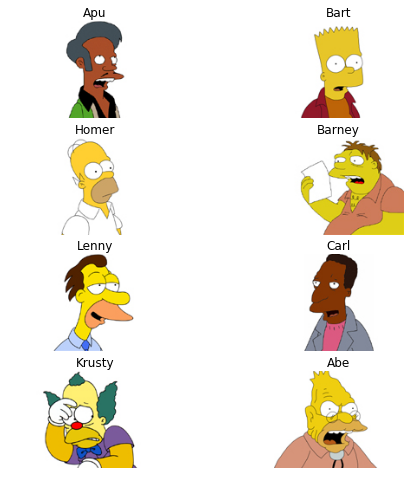

Abe:  ['Abe', 'Homer', 'Bart', 'Barney', 'Lenny', 'Carl', 'Apu', 'Krusty']
Apu:  ['Apu', 'Lenny', 'Homer', 'Carl', 'Krusty', 'Barney', 'Abe', 'Bart']
Barney:  ['Barney', 'Carl', 'Lenny', 'Abe', 'Bart', 'Apu', 'Krusty', 'Homer']
Bart:  ['Bart', 'Krusty', 'Abe', 'Lenny', 'Barney', 'Homer', 'Carl', 'Apu']
Carl:  ['Carl', 'Barney', 'Krusty', 'Apu', 'Homer', 'Abe', 'Bart', 'Lenny']
Homer:  ['Homer', 'Abe', 'Apu', 'Krusty', 'Carl', 'Bart', 'Lenny', 'Barney']
Krusty:  ['Krusty', 'Bart', 'Carl', 'Homer', 'Apu', 'Lenny', 'Barney', 'Abe']
Lenny:  ['Lenny', 'Apu', 'Barney', 'Bart', 'Abe', 'Krusty', 'Homer', 'Carl']


In [23]:
next_round(people)
for p in people:
    print(p.name + ': ', p.partners)

## Round 2

Barney ['Abe', 'Krusty', 'Homer', 'Lenny', 'Bart', 'Carl', 'Apu']
Carl ['Abe', 'Krusty', 'Homer', 'Lenny', 'Bart']
Lenny ['Abe', 'Krusty', 'Homer']
Krusty ['Abe']


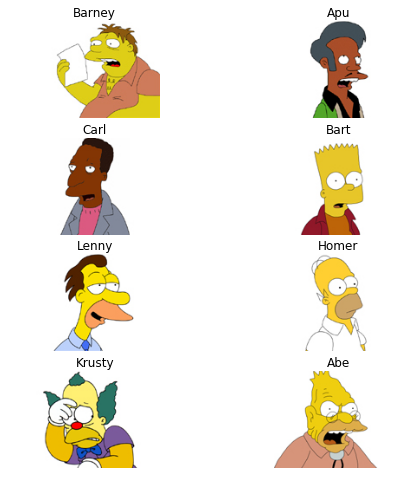

Abe:  ['Abe', 'Bart', 'Krusty']
Apu:  ['Apu', 'Carl', 'Barney']
Barney:  ['Barney', 'Lenny', 'Apu']
Bart:  ['Bart', 'Abe', 'Carl']
Carl:  ['Carl', 'Apu', 'Bart']
Homer:  ['Homer', 'Krusty', 'Lenny']
Krusty:  ['Krusty', 'Homer', 'Abe']
Lenny:  ['Lenny', 'Barney', 'Homer']


In [296]:
next_round(people)
for p in people:
    print(p.name + ': ', p.partners)

## Round 3

In [300]:
next_round(people)
for p in people:
    print(p.name + ': ', p.partners)

Carl ['Barney', 'Abe', 'Apu', 'Homer', 'Lenny', 'Bart', 'Krusty']
Carl ['Krusty', 'Barney', 'Abe', 'Apu', 'Homer', 'Lenny']
Carl ['Bart', 'Krusty', 'Barney', 'Abe', 'Apu', 'Homer']
Homer ['Bart', 'Krusty', 'Barney', 'Abe', 'Apu']
Homer ['Apu', 'Bart', 'Krusty', 'Barney']
Homer ['Abe', 'Apu', 'Bart', 'Krusty']
Krusty ['Abe', 'Apu', 'Bart']
Krusty ['Bart', 'Abe']
Abe ['Bart']
Abe []
used up all the choices for Abe
Lenny []


IndexError: pop from empty list

## Round 4

In [298]:
next_round(people)
for p in people:
    print(p.name + ': ', p.partners)

Krusty ['Barney', 'Homer', 'Carl', 'Apu', 'Abe', 'Lenny', 'Bart']
Lenny ['Barney', 'Homer', 'Carl', 'Apu', 'Abe']
Apu ['Barney', 'Homer', 'Carl']
Apu ['Carl', 'Barney']
Apu ['Homer', 'Carl']
Apu ['Barney', 'Homer']
used up all the choices for Apu
Abe ['Barney', 'Homer']
Barney []


IndexError: pop from empty list

## Round 5

Homer ['Bart', 'Krusty', 'Carl', 'Lenny', 'Barney', 'Abe', 'Apu']
Abe ['Bart', 'Krusty', 'Carl', 'Lenny', 'Barney']
Lenny ['Bart', 'Krusty', 'Carl']
Lenny ['Carl', 'Bart']
Bart ['Carl']


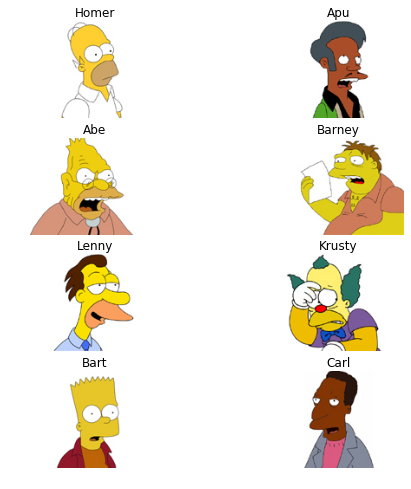

Abe:  ['Abe', 'Krusty', 'Homer', 'Bart', 'Carl', 'Barney']
Apu:  ['Apu', 'Carl', 'Barney', 'Lenny', 'Krusty', 'Homer']
Barney:  ['Barney', 'Bart', 'Apu', 'Krusty', 'Lenny', 'Abe']
Bart:  ['Bart', 'Barney', 'Krusty', 'Abe', 'Homer', 'Carl']
Carl:  ['Carl', 'Apu', 'Lenny', 'Homer', 'Abe', 'Bart']
Homer:  ['Homer', 'Lenny', 'Abe', 'Carl', 'Bart', 'Apu']
Krusty:  ['Krusty', 'Abe', 'Bart', 'Barney', 'Apu', 'Lenny']
Lenny:  ['Lenny', 'Homer', 'Carl', 'Apu', 'Barney', 'Krusty']


In [289]:
next_round(people,figsize=figsize)
for p in people:
    print(p.name + ': ', p.partners)

## Round 6

Krusty ['Abe', 'Carl', 'Lenny', 'Homer', 'Apu', 'Bart', 'Barney']
Krusty ['Barney', 'Abe', 'Carl', 'Lenny', 'Homer', 'Apu']
Krusty ['Bart', 'Barney', 'Abe', 'Carl', 'Lenny', 'Homer']
Krusty ['Apu', 'Bart', 'Barney', 'Abe', 'Carl', 'Lenny']
Lenny ['Apu', 'Bart', 'Barney', 'Abe', 'Carl']
Lenny ['Carl', 'Apu', 'Bart', 'Barney']
Barney ['Carl', 'Apu', 'Bart']
Barney ['Bart', 'Carl']
Barney ['Apu', 'Bart']
Bart ['Apu']


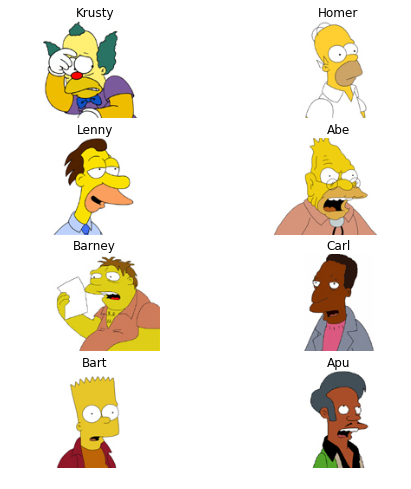

Abe:  ['Abe', 'Krusty', 'Homer', 'Bart', 'Carl', 'Barney', 'Lenny']
Apu:  ['Apu', 'Carl', 'Barney', 'Lenny', 'Krusty', 'Homer', 'Bart']
Barney:  ['Barney', 'Bart', 'Apu', 'Krusty', 'Lenny', 'Abe', 'Carl']
Bart:  ['Bart', 'Barney', 'Krusty', 'Abe', 'Homer', 'Carl', 'Apu']
Carl:  ['Carl', 'Apu', 'Lenny', 'Homer', 'Abe', 'Bart', 'Barney']
Homer:  ['Homer', 'Lenny', 'Abe', 'Carl', 'Bart', 'Apu', 'Krusty']
Krusty:  ['Krusty', 'Abe', 'Bart', 'Barney', 'Apu', 'Lenny', 'Homer']
Lenny:  ['Lenny', 'Homer', 'Carl', 'Apu', 'Barney', 'Krusty', 'Abe']


In [290]:
next_round(people,figsize=figsize)
for p in people:
    print(p.name + ': ', p.partners)

## Round 7

Bart ['Carl', 'Lenny', 'Abe', 'Apu', 'Barney', 'Homer', 'Krusty']
Bart ['Krusty', 'Carl', 'Lenny', 'Abe', 'Apu', 'Barney']
Bart ['Homer', 'Krusty', 'Carl', 'Lenny', 'Abe', 'Apu']
Bart ['Barney', 'Homer', 'Krusty', 'Carl', 'Lenny', 'Abe']
Bart ['Apu', 'Barney', 'Homer', 'Krusty', 'Carl', 'Lenny']
Bart ['Abe', 'Apu', 'Barney', 'Homer', 'Krusty', 'Carl']
Carl ['Abe', 'Apu', 'Barney', 'Homer', 'Krusty']
Homer ['Abe', 'Apu', 'Barney']
Apu ['Abe']


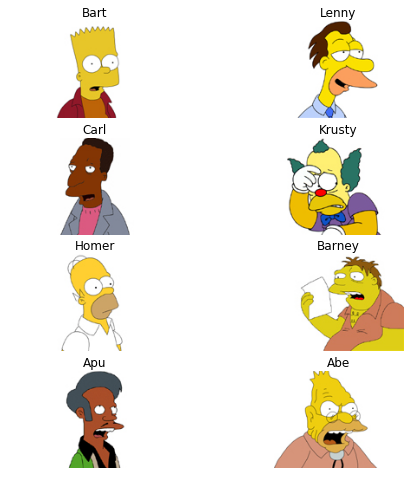

Abe:  ['Abe', 'Krusty', 'Homer', 'Bart', 'Carl', 'Barney', 'Lenny', 'Apu']
Apu:  ['Apu', 'Carl', 'Barney', 'Lenny', 'Krusty', 'Homer', 'Bart', 'Abe']
Barney:  ['Barney', 'Bart', 'Apu', 'Krusty', 'Lenny', 'Abe', 'Carl', 'Homer']
Bart:  ['Bart', 'Barney', 'Krusty', 'Abe', 'Homer', 'Carl', 'Apu', 'Lenny']
Carl:  ['Carl', 'Apu', 'Lenny', 'Homer', 'Abe', 'Bart', 'Barney', 'Krusty']
Homer:  ['Homer', 'Lenny', 'Abe', 'Carl', 'Bart', 'Apu', 'Krusty', 'Barney']
Krusty:  ['Krusty', 'Abe', 'Bart', 'Barney', 'Apu', 'Lenny', 'Homer', 'Carl']
Lenny:  ['Lenny', 'Homer', 'Carl', 'Apu', 'Barney', 'Krusty', 'Abe', 'Bart']


In [291]:
next_round(people,figsize=figsize)
for p in people:
    print(p.name + ': ', p.partners)

## Round 8

In [292]:
next_round(people,figsize=figsize)
for p in people:
    print(p.name + ': ', p.partners)

Krusty ['Carl', 'Apu', 'Lenny', 'Bart', 'Abe', 'Barney', 'Homer']
Krusty ['Homer', 'Carl', 'Apu', 'Lenny', 'Bart', 'Abe']
Krusty ['Barney', 'Homer', 'Carl', 'Apu', 'Lenny', 'Bart']
Krusty ['Abe', 'Barney', 'Homer', 'Carl', 'Apu', 'Lenny']
Krusty ['Bart', 'Abe', 'Barney', 'Homer', 'Carl', 'Apu']
Krusty ['Lenny', 'Bart', 'Abe', 'Barney', 'Homer', 'Carl']
Krusty ['Apu', 'Lenny', 'Bart', 'Abe', 'Barney', 'Homer']
Krusty ['Carl', 'Apu', 'Lenny', 'Bart', 'Abe', 'Barney']
used up all the choices for Krusty
Barney ['Carl', 'Apu', 'Lenny', 'Bart', 'Abe']
Barney ['Abe', 'Carl', 'Apu', 'Lenny']
Barney ['Bart', 'Abe', 'Carl', 'Apu']
Barney ['Lenny', 'Bart', 'Abe', 'Carl']
Barney ['Apu', 'Lenny', 'Bart', 'Abe']
Barney ['Carl', 'Apu', 'Lenny', 'Bart']
used up all the choices for Barney
Bart ['Carl', 'Apu', 'Lenny']
Bart ['Lenny', 'Carl']
Bart ['Apu', 'Lenny']
Bart ['Carl', 'Apu']
used up all the choices for Bart
Apu ['Carl']
Apu []
used up all the choices for Apu
Everyone has been paired up!
Abe:  [